## The Ideal Reheat Rankine Cycle
Consider a steam power plant operating on the ideal reheat Rankine cycle. Here are the states:

<!-- ![title](rankineReheatCycle.png)
--->



- (1) after the condenser, entering the pump;
- (2) after the pump, entering the boiler;
- (3) after the boiler, entering the high pressure turbine;
- (4) after the turbine, entering the boiler again (reheat);
- (5) after the boiler, entering the low pressure turbine;
- (6) after the turbine, entering the condenser.

Steam enters the high-pressure turbine at $p_3$ and $T_3$.

Steam then enters the low-pressure turbine at $p_5$ and $T_5$.

Steam is then condensed in the condeser at a pressure of $p_6$. 

The net power produced by this plant is $W_\text{net}$.

Determine:
- the rate of heat addition and rejection
- the thermal efficiency of this cycle.

In [95]:
T3_C = 315.5556 # 600 F
p3_MPa = 41.36854/10 # 600 psia

T5_C = T3_C # 600 F
p5_MPa = 13.78951/10 # 200 psia

p6_kPa = (0.6894757/10)*1000 # 10 psia

Wnet_kW = 5000

# conversion 
T3_K = T3_C + 273.15
T5_K = T5_C + 273.15
p6_MPa = p6_kPa/1000

### Solution
An ideal reheat steam Rankine cycle produces power. The rates of heat addition and rejection and the thermal efficiency are to be determined. Also, the effect of changing reheat pressure is to be investigated. 

### Assumptions
- steady operating conditions exist
- kinetic and potential energy changes are negligible 
- as the power plant operates on the ideal Rankine cycle, we assume that the pump and turbine are isentropic; there are no pressure drops in the boiler and condenser; and steam leaves the condenser and enters the pump as a saturated liquid at the condenser pressure.

<!--
![title](rankineReheatCycleTSdiagram.png)
-->

In [96]:
p1_MPa = p6_MPa
p2_MPa = p3_MPa
p4_MPa = p5_MPa

### Analysis
To solve this, we need to know the properties at all of the states. For this, we can use the IAPWS module as our working fluid is water. 

In [97]:
!pip install iapws

IAPWS stands for "The International Association for the Properties of Water and Steam". According to them, they are "...an international non-profit association of national organizations concerned with the properties of water and steam, particularly thermophysical properties, cycle chemistry guidelines, and other aspects of high-temperature steam, water and aqueous mixtures relevant to thermal power cycles and other industrial and scientific applications."

This looks like:

In [98]:
from iapws import IAPWS97

In order to calculate a thermodynamic property, we need to define several properties, such as temperature $T$ and pressure $p$, and for vapor-liquid mixtures, the quality $x$. $T$ should be in the units Kelvin, $p$ should be in MPa, and $x$ should be between 0 and 1.

State 1 is a saturated liquid. Therefore, $x = 0$:

In [99]:
x1 = 0

We then have enough information to calculate all of the thermodynamic properties at this state. The first step in determining properties like $p$, specific entropy $s$, specific enthalpy $h$, etc., is to use the IAPWS97 module. This is written in this case as:

In [100]:
# pressure should be in the units MPa, 
# temperature in the units K, 
# quality a number betwee 0 and 1. 
P1 = p1_MPa
sat_liquid1 = IAPWS97(P=P1, x=quality)

From this, we can now calculate $T_1$ (K), $s_1$ (kJ/(kg K)), $h_1$ (kJ/kg), specific volume $v_1$ (m$^3$/kg).

In [101]:
T1 = sat_liquid1.T # K
s1 = sat_liquid1.s # kJ/kg*K
h1 = sat_liquid1.h # kJ/kg
v1 = sat_liquid1.v # m3/kg

If we want to analyze a steam cycle, we can define three other states. Here we will look at a Rankine cycle, an idealized cycle for a thermoelectric powerplant. So we can say that state 2 is after the compressor, so the pressure is higher ($p_2$), and we will assume that the compressor is isentropic ($s_1 = s_2$):

In [102]:
P2 = p2_MPa        # MPa
s2 = s1            # kJ/kg*K

Again, we can calculate the properties at this state as:

In [103]:
sat_liquid2 = IAPWS97(P=P2, s=s1)
T2 = sat_liquid2.T # K
h2 = sat_liquid2.h # kJ/kg

With the values of $p_1$, $p_2$, and $v_1$ known, we can calculate the specific work, $w_{12}$ (kJ/kg) done by this compressor as:

In [104]:
w12 = v1*(P2 - P1)*1e6/1e3 # kJ/kg; 
# Pressure is in MPa units, 
# and we want this to be in kJ/kg, 
# hence the 1e6/1e3 ratio.

Note: 1e6 = 1000000 and 1e3 = 1000

We can print this value as:

In [105]:
print('The compressor work is: {0:1.4f} kJ/kg'.format(w12))

The compressor work is: 4.2128 kJ/kg


We can now define state 3 of our Rankine cycle, which is after the boiler. 

We know $T_3$ and $p_3 = p_2$:

In [106]:
T3 = T3_K # K
P3 = P2 # definition of isobaric, MPa

Again, we can calculate the properties at this state as:

In [107]:
steam = IAPWS97(P=P3, T=T3)
h3 = steam.h # kJ/kg
s3 = steam.s # kJ/kg*K

We can calculate the heat transferred to the water $Q_\text{b}$ (kJ/kg), generating steam by taking the difference in specific enthalpy between states 3 and 2:

Next, the high pressure steam passes through the turbine, which is used to generate electricity in a powerplant. Here we assume that the turbine operates isentropically, $s_4 = s_3$. We also assume that the pressure at the exit of the high pressure turbine is the same as the pressure entering the low pressure turbine, $p_4 = p_5$

With these assumptions, we can calculate the thermodynamic properties of state 4 as:

In [108]:
s4 = s3 # isentropic #kJ/kg*K

In [109]:
P4 = p4_MPa # MPa

In [110]:
steam = IAPWS97(P=P4,s=s4)
T4 = steam.T # K
h4 = steam.h # kJ/kg
x4 = steam.x

We can then calculate the specific work generated by the high pressure turbine, $w_{34}$:

In [111]:
w34 = h4 - h3 # work extracted from the expansion, kJ/kg
print('The turbine work is: {0:1.2f} kJ/kg'.format(w34))

The turbine work is: -238.25 kJ/kg


From the T-s diagram, we see that state 4 is a saturated liquid-vapor region. As an aside, we can calculate its quality:

In [112]:
print('The quality of the vapor at state 4 is: {0:1.2f} (-)'.format(x4))

The quality of the vapor at state 4 is: 0.99 (-)


After the reheating stage, we can calculate the properties of the steam.

In [113]:
P5 = p5_MPa
T5 = T5_K

steamReheat = IAPWS97(P=P5, T=T5)
h5 = steamReheat.h # kJ/kg
s5 = steamReheat.s # kJ/kg*K

We assume that the turbine operates isentropically, therefore $s_6 = s_5$:

In [114]:
s6 = s5

The pressure of the steam entering the condenser is given. So with the entropy and pressure at that state defined, we know the properties:

In [115]:
P6 = p6_MPa
vapor = IAPWS97(P=P6, s=s6)
h6 = vapor.h
x6 = vapor.x
T6 = vapor.T

In [116]:
print('The vapor quality at state 6 is: {0:1.2f} (-)'.format(x6))

The vapor quality at state 6 is: 0.93 (-)


The net power output from the low pressure turbine can then be calculated as:

In [117]:
w56 = h6 - h5 # work extracted from the expansion, kJ/kg
print('The low pressure turbine work is: {0:1.2f} kJ/kg'.format(w56))

The low pressure turbine work is: -584.58 kJ/kg


Next, the steam enters the condenser where it is cooled, condensing back into a liquid, where is it is then pumped by the compressor back into the boiler. The amount of heat removed by the condenser can be calculated as ($Q_{\text{c}}$):

In [118]:
Qc = h6 - h1 # Cooling from T4 to T1, kJ/kg
print('The condenser heat duty is {0:1.2f} kJ/kg'.format(Qc))

The condenser heat duty is 2116.12 kJ/kg


In [119]:
Qb = (h3 - h2)+(h5 - h4) # heat required to make the steam, kJ/kg

print('The boiler heat duty is: {0:1.2f} kJ/kg'.format(Qb))

The boiler heat duty is: 2934.74 kJ/kg


Since we know the power output, we can calculate the mass flow rate as: $$\dot{W}_\text{net} = \dot{m}w_\text{net} $$

$$\implies \dot{m} =  \frac{\dot{W}_\text{net}}{w_\text{net}}$$

In [120]:
mdot_kgPerS = Wnet_kW / (-w34 - w56)
print('The mass flow rate is: {0:1.2f} kg/s'.format(mdot_kgPerS))

The mass flow rate is: 6.08 kg/s


The heat addition and rejection are:

In [121]:
Qin_kW = mdot_kgPerS*Qb
print('The boiler heat duty is: {0:1.2f} kW'.format(Qin_kW))

The boiler heat duty is: 17833.22 kW


In [122]:
Qout_kW = mdot_kgPerS*Qc
print('The condenser heat duty is {0:1.2f} kW'.format(Qout_kW))

The condenser heat duty is 12858.80 kW


The efficiency of the Rankine cycle can be calculated then as:

In [123]:
eta = Wnet_kW / Qin_kW
print('The overall efficiency is {0:1.2%}.'.format(eta))

The overall efficiency is 28.04%.


The negative sign we have in front of the $w$ terms is due to the convention we used here. In our convention, the work we calculated was the energy consumed by the device. Normally, the convention in thermodynamics is that the work done by a system is positive, and the heat transferred into a system is positive. The opposites of this are then negative. For whatever convention you decide to use, the main point is to be consistent, although we recommend following the norm. 

We can now show this Rankine cycle on the T-s diagram, as is customary. We can also save this plot as an image. For this we need to import some additional modules. 

In [124]:
import numpy as np
import matplotlib.pyplot as plt

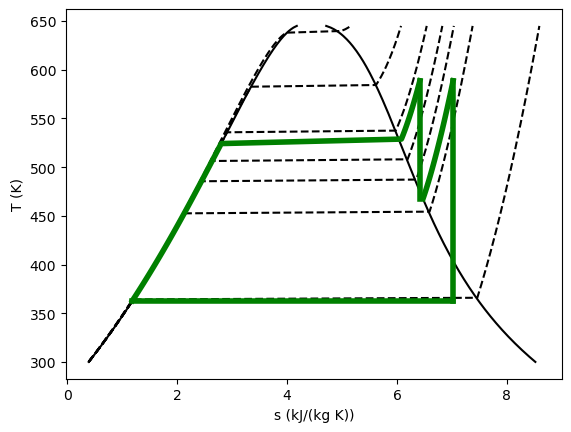

In [125]:
plt.figure()
plt.clf()
T = np.linspace(300, 372+273, 200) # range of temperatures
for P in [0.075, 1, 2, 3, 5, 10, 20]: #MPa
    steam = [IAPWS97(T=t, P=P) for t in T]
    S = [s.s for s in steam]
    plt.plot(S, T, 'k--')

# saturated vapor and liquid entropy lines
svap = [s.s for s in [IAPWS97(T=t, x=1) for t in T]]
sliq = [s.s for s in [IAPWS97(T=t, x=0) for t in T]]

plt.plot(svap, T, 'k-')
plt.plot(sliq, T, 'k-')

plt.xlabel('s (kJ/(kg K))')
plt.ylabel('T (K)')

T23 = np.linspace(T2, T3)
S23 = [s.s for s in [IAPWS97(P=P2, T=t) for t in T23]]

T45 = np.linspace(T4+0.2, T5) # I added "0.2" degree to T4 so the process didn't go down to a saturated liquid
S45 = [s.s for s in [IAPWS97(P=P4, T=t) for t in T45]]

T61 = np.linspace(T6, T1) 
x61 = np.linspace(x6,x1)
S61 = [s.s for s in [IAPWS97(P=P1, x=X) for X in x61]]

plt.plot([s1, s2], [T1, T2], 'g-', lw=4) # Path 1 to 2
plt.plot(S23, T23, 'g-', lw=4) # path from 2 to 3 is isobaric
plt.plot([s3, s4], [T3, T4], 'g-', lw=4) # path from 3 to 4 is isentropic
plt.plot(S45, T45, 'g-', lw=4) # path from 4 to 5 is isobaric
plt.plot([s5, s6], [T5, T6], 'g-', lw=4) # path from 5 to 6 is isentropic
plt.plot(S61, T61, 'g-', lw=4) # and from 6 to 1 is isobaric

plt.savefig('rankineReheatCycleTSdiagram_plot.png')

It is instructive to compare the efficiency we calculated here with the Carnot efficiency. Recall that:

$\eta_\text{Carnot} = 1 - \frac{T_\text{C}}{T_\text{H}}$.

In [126]:
TC_K = T6
TH_K = T3

In [127]:
eta_carnot = 1 - TC_K / TH_K

print('The Carnot efficiency of this power plant is {0:1.2%}.'.format(eta_carnot))

The Carnot efficiency of this power plant is 38.39%.
